In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pandas import DataFrame

In [39]:
data = pd.read_csv("kickstarter_data.csv")
data['success_rate'] = data['pled'] / data['goal'] * 100
data.columns, data.shape

(Index(['Unnamed: 0', 'URL', 'pled', 'goal', 'date', 'period', 'status',
        'text_am', 'n_img', 'n_vid', 'n_pled_t', 'min_pled_t', 'max_pled_t',
        'mean_pled_t', 'step_pled_t', 'cr_time', 'backed', 'created', 'site',
        'rpg', 'platformer', 'shooter', 'fighting', 'survival', 'horror',
        'strategy', 'arcade', 'simulator', 'mmo', 'indie', 'action', 'quest',
        'adventure', 'mgp', 'cont', 'curr', 'succsess', 'is_site',
        'success_rate'],
       dtype='object'),
 (8421, 39))

In [40]:
data[data['goal'] < 5]['success_rate'].mean()

331540.3557309402

In [41]:
df = data
if 'Unnamed: 0' in df.columns or 'succsess' in df.columns:
    df = data.drop(columns=['Unnamed: 0', 'succsess'])
df.shape

(8421, 37)

In [42]:
df.isnull().sum()

URL                0
pled               0
goal               0
date               0
period             0
status             0
text_am            0
n_img              0
n_vid              0
n_pled_t           0
min_pled_t         0
max_pled_t         0
mean_pled_t        0
step_pled_t        0
cr_time            0
backed             0
created            0
site            2471
rpg                0
platformer         0
shooter            0
fighting           0
survival           0
horror             0
strategy           0
arcade             0
simulator          0
mmo                0
indie              0
action             0
quest              0
adventure          0
mgp                0
cont               0
curr               0
is_site            0
success_rate       0
dtype: int64

In [43]:
numeric_columns = ['pled',
  'goal',
  'period',
  'text_am',
  'n_img',
  'n_vid',
  'n_pled_t',
  'min_pled_t',
  'max_pled_t',
  'mean_pled_t',
  'step_pled_t',
  'cr_time',
  'backed',
  'created',
  'mgp',
  'cont']
binary_columns = ['rpg',
  'platformer',
  'shooter',
  'fighting',
  'survival',
  'horror',
  'strategy',
  'arcade',
  'simulator',
  'mmo',
  'indie',
  'action',
  'quest',
  'adventure',
  'is_site']
futures = ['text_am', 'n_img', 'n_vid', 'period', 'cont', 'mgp', 'n_pled_t']
target_column = 'success_rate'
numeric_columns, target_column

(['pled',
  'goal',
  'period',
  'text_am',
  'n_img',
  'n_vid',
  'n_pled_t',
  'min_pled_t',
  'max_pled_t',
  'mean_pled_t',
  'step_pled_t',
  'cr_time',
  'backed',
  'created',
  'mgp',
  'cont'],
 'success_rate')

In [44]:
def draw_boxplots(df, numeric_columns):
    fig, axes = plt.subplots(4, 4, figsize=(18, 40))
    for i in range(4):
        for j in range(4):
            if 4 * i + j == len(numeric_columns):
                return
            axes[i, j].boxplot(df[numeric_columns[4 * i + j]], labels=[numeric_columns[4 * i + j]]) 

In [45]:
def draw_hist(df, numeric_columns, bar_type=None):
    bar_type = 'bar' if bar_type == None else bar_type
    fig, axes = plt.subplots(2, 3, figsize=(18,14))
    for i in range(2):
        for j in range(3):
            if 4 * i + j == len(numeric_columns):
                return
            axes[i, j].hist(df[numeric_columns[4 * i + j]], label=numeric_columns[4 * i + j], histtype=bar_type, bins=10)
            axes[i, j].set_xlabel(f'Количество {numeric_columns[4 * i + j]}')
            axes[i, j].legend()

In [46]:
def draw_hist_2(df, numeric_columns, bar_type=None):
    bar_type = 'bar' if bar_type == None else bar_type
    #     fig, axes = plt.subplots(4, 4, figsize=(18, 20))  
    for i in range(4):
        for j in range(4):
            if 4 * i + j == len(numeric_columns):
                return
            plt.figure(figsize=(5, 6))
            df[numeric_columns[4 * i + j]].hist(label=numeric_columns[4 * i + j], histtype=bar_type, bins=10)
            plt.xlabel = f'Количество {numeric_columns[4 * i + j]}'
            plt.ylabel = 'Количество измерений'
            plt.legend()

(8194, 39)

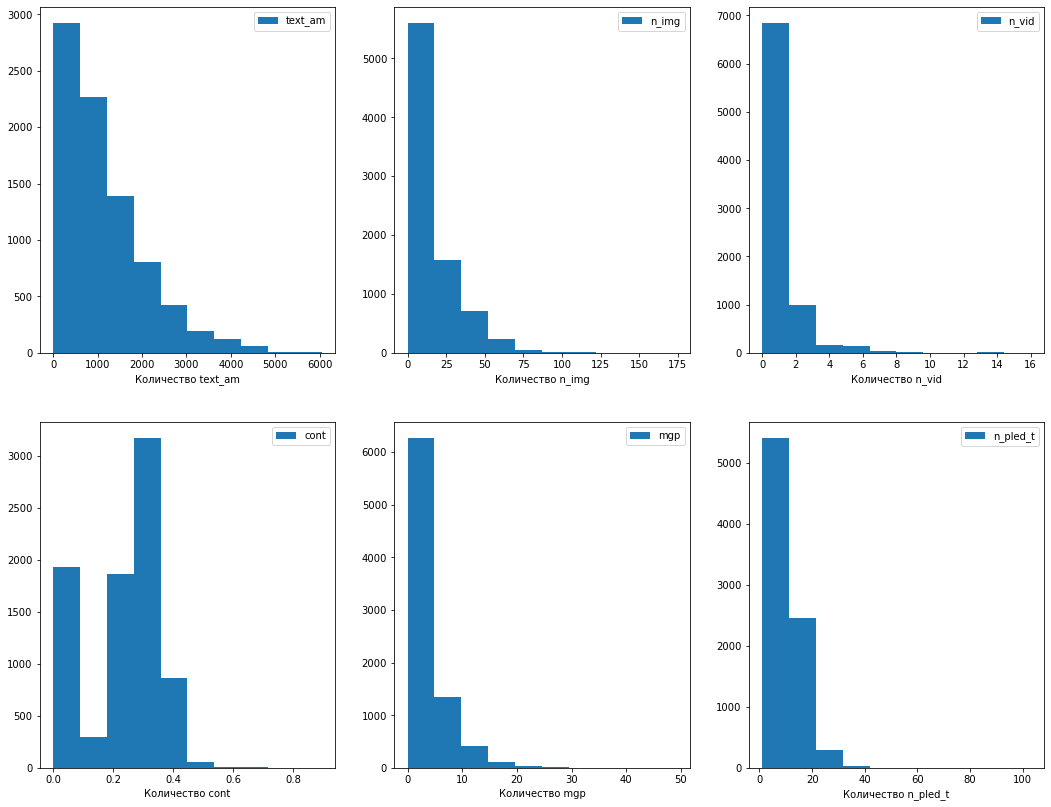

In [47]:
# Remove emissions
df = data
df = df[df['goal'] > 5]
df = df[df['period'] < 80]

df['site'].fillna('', inplace=True)

# Using 3 sigmas rule
n_sigmas = 3

created_std = df['created'].std() # Taken from description
created_mean = df['created'].mean()
df = df[(df['created'] >= created_mean - created_std * n_sigmas) & (df['created'] <= created_mean + created_std * n_sigmas)]

draw_hist(df, futures + ['created'], 'bar')
df.shape

In [48]:
df.isna().sum()

Unnamed: 0      0
URL             0
pled            0
goal            0
date            0
period          0
status          0
text_am         0
n_img           0
n_vid           0
n_pled_t        0
min_pled_t      0
max_pled_t      0
mean_pled_t     0
step_pled_t     0
cr_time         0
backed          0
created         0
site            0
rpg             0
platformer      0
shooter         0
fighting        0
survival        0
horror          0
strategy        0
arcade          0
simulator       0
mmo             0
indie           0
action          0
quest           0
adventure       0
mgp             0
cont            0
curr            0
succsess        0
is_site         0
success_rate    0
dtype: int64

In [49]:
# Descriptive statistics
desc = df[futures].describe()
desc.append(pd.Series(df[futures].median(), index=futures, name='median'))
desc

,text_am,n_img,n_vid,period,cont,mgp,n_pled_t
count,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000,8194.000000
mean,1131.966195,14.340371,0.749695,33.537344,0.224063,3.213599,10.058335
std,915.530566,16.606354,1.336821,10.126667,0.137587,4.057055,5.931977
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,420.000000,1.000000,0.000000,30.000000,0.148704,0.230400,6.000000
50%,883.000000,8.000000,0.000000,30.000000,0.268624,1.766246,9.000000
75%,1592.000000,23.000000,1.000000,33.000000,0.321691,4.681821,13.000000
max,6042.000000,174.000000,16.000000,79.000000,0.894847,49.141376,103.000000


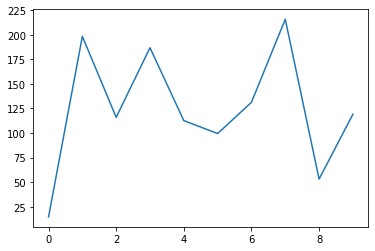

In [50]:
xs = []
ys = []


for vids in sorted(df['n_vid'].unique()):
    mean_sr = df[df['n_vid'] == vids]['success_rate'].mean()
    if df[df['n_vid'] == vids].shape[0] > 5:
        xs.append(vids)
        ys.append(mean_sr)
    
plt.plot(xs, ys) 
plt.xlabel = 'Количество видео'
plt.ylabel = 'Среднее отношения pled / goal'

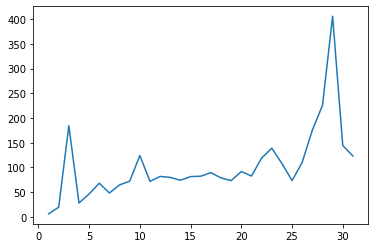

In [51]:
xs = []
ys = []


for vids in sorted(df['n_pled_t'].unique()):
    mean_sr = df[df['n_pled_t'] == vids]['success_rate'].mean()
    if df[df['n_pled_t'] == vids].shape[0] > 7:
        xs.append(vids)
        ys.append(mean_sr)
    
plt.plot(xs, ys) 
plt.xlabel = 'Количество категорий доната'
plt.ylabel = 'Среднее отношения pled / goal'

In [52]:
# Linear models
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
import numpy as np

In [53]:
numeric_columns = [
#   'pled',
  'goal',
#   'period',
  'text_am',
  'n_img',
  'n_vid',
  'n_pled_t',
  'min_pled_t',
  'max_pled_t',
  'mean_pled_t',
  'step_pled_t',
  'cr_time',
  'backed',
  'created',
  'mgp',
  'cont']
binary_columns = ['rpg',
  'platformer',
  'shooter',
  'fighting',
  'survival',
  'horror',
  'strategy',
  'arcade',
  'simulator',
  'mmo',
  'indie',
  'action',
  'quest',
  'adventure',
  'is_site']
columns = numeric_columns + binary_columns

In [54]:
def test_mse(model, X, y):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    
    return mse

In [55]:
train_X, test_X, train_y, test_y = train_test_split(df[columns], df[target_column], train_size=0.8)

In [56]:
scaler = StandardScaler()

train_data = scaler.fit_transform(train_X)
test_x_data = scaler.transform(test_X)
test_y_data = test_y

In [57]:
# Simple Linear Regression
model = LinearRegression()
model.fit(train_data, train_y)

test_mse(model, train_data, train_y), test_mse(model, test_x_data, test_y_data), model.coef_

(492315.7615962,
 1348896.7463742956,
 array([ -4.48178944,   9.87425434,  -2.75164121,  28.38608503,
        -10.05188365,   0.21878613, -16.22194012,   0.76972548,
         -3.38480888,  32.99473703,  -4.11078782,   0.47328076,
         20.45010936,  10.37972852,   7.69859916,  -0.89158104,
         -4.93689433,  -5.78544552,  -5.45966113,  -5.32704401,
         -9.57213128,   0.39214767,  -5.40475567,  -4.23065383,
          0.51933461, -10.07663492,  -2.38688583,  -2.86576079,
         13.70815176]))

In [58]:
# Testing regression /w L1 regularization
lasso = Lasso()
lasso.fit(train_data, train_y)

test_mse(lasso, train_data, train_y), test_mse(lasso, test_x_data, test_y_data), lasso.coef_

(492347.17276572826,
 1348639.727629154,
 array([ -3.59525678,   6.48378408,   0.        ,  27.40562338,
         -7.13301499,   0.        , -16.21302784,  -0.        ,
         -2.02238162,  31.79801834,  -2.3566672 ,   0.        ,
         16.7969376 ,   9.49684992,   6.29640948,  -0.        ,
         -3.88449042,  -4.64925019,  -4.5961767 ,  -4.11130004,
         -8.1721371 ,   0.        ,  -4.18460398,  -3.12625476,
          0.        ,  -8.9658395 ,  -0.96072867,  -1.57175983,
         12.56017914]))

In [59]:
# Testing regression /w L2 regularization
ridge = Ridge()
ridge.fit(train_data, train_y)

test_mse(ridge, train_data, train_y), test_mse(ridge, test_x_data, test_y_data), ridge.coef_

(492315.7617779996,
 1348897.3046843787,
 array([ -4.48095324,   9.86929675,  -2.73679857,  28.38124057,
        -10.04852123,   0.22307265, -16.2059642 ,   0.7527899 ,
         -3.38223313,  32.98843985,  -4.10801073,   0.47514521,
         20.43484621,  10.37877842,   7.69708433,  -0.89155444,
         -4.93644514,  -5.78423752,  -5.45928463,  -5.32584719,
         -9.57049026,   0.39198678,  -5.40353992,  -4.22964915,
          0.51926407, -10.07489292,  -2.38569462,  -2.86499464,
         13.7060239 ]))

In [60]:
elastic = ElasticNet()
elastic.fit(train_data, train_y)

test_mse(elastic, train_data, train_y), test_mse(elastic, test_x_data, test_y_data), elastic.coef_

(492727.26912330603,
 1350346.9689934873,
 array([-3.08778152,  4.6906472 ,  4.81616655, 18.20561101, -2.78275106,
         0.42259428, -7.02193921, -4.52230994, -3.61352739, 21.09647037,
         0.30036325,  2.60907825,  9.20165615,  7.73703018,  4.27169591,
        -0.        , -3.17985886, -3.18636846, -3.71897458, -2.77084339,
        -5.58610403,  0.        , -2.75652441, -2.65288711,  0.81785139,
        -5.88044886, -0.23174547, -0.5004941 ,  9.05584794]))

In [62]:
# Get mean coeffs for futures
coeffs = np.zeros((29))
rounds = 20
for i in range(20):
    scaler = StandardScaler()

    train_data = scaler.fit_transform(train_X)
    test_x_data = scaler.transform(test_X)
    test_y_data = test_y
    
    model = LinearRegression()
    model.fit(train_data, train_y)
    coeffs += model.coef_
    
    lasso = Lasso()
    lasso.fit(train_data, train_y)
    coeffs += lasso.coef_
    
    ridge = Ridge()
    ridge.fit(train_data, train_y)
    coeffs += ridge.coef_
    
    elastic = ElasticNet()
    elastic.fit(train_data, train_y)
    coeffs += elastic.coef_
    
mean_coeffs = coeffs / (rounds * 4)
{k: v for k, v in sorted([(k, v) for k, v in zip(columns, mean_coeffs)], key=lambda x: abs(x[1]), reverse=True)}

{'cr_time': 29.719416396237694,
 'n_vid': 25.594639995526478,
 'mgp': 16.72088732954874,
 'max_pled_t': -13.915717844883224,
 'is_site': 12.257550685188184,
 'cont': 9.498096759805215,
 'action': -8.749454048857274,
 'strategy': -8.225215669733187,
 'text_am': 7.729495594520936,
 'n_pled_t': -7.50404273229243,
 'rpg': 6.490947219686828,
 'fighting': -4.851325422809558,
 'survival': -4.808524258974558,
 'simulator': -4.437355995175836,
 'horror': -4.38375865836923,
 'shooter': -4.23442218907171,
 'goal': -3.9114452453307025,
 'mmo': -3.559861213010371,
 'step_pled_t': -3.100737752804856,
 'backed': -2.5687756247944113,
 'adventure': -1.9507523385464676,
 'quest': -1.4912636473049046,
 'created': 0.8893760516032577,
 'mean_pled_t': -0.7499486389163281,
 'indie': 0.4641125153641351,
 'platformer': -0.4457838700675315,
 'min_pled_t': 0.2161132666955759,
 'arcade': 0.19603361112838777,
 'n_img': -0.16806830790244787}

In [63]:
# Neural network
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [64]:
def get_type(rate):
    type_ = 0
    for i in np.linspace(0, 175, 8):
        if rate < i + 25:
            return type_
        type_ += 1
    return 8

In [65]:
# Add success type

types = []

for idx, row in df.iterrows():
    types.append(get_type(row[-1]))

types = pd.Series(types, dtype=int)
df = df.assign(succes_type=types.values)
if 'success_rate' in df.columns:
    df = df.drop(columns='success_rate')
if 'success' in df.columns:
    df = df.drop(columns='success')

In [66]:
df.columns

Index(['Unnamed: 0', 'URL', 'pled', 'goal', 'date', 'period', 'status',
       'text_am', 'n_img', 'n_vid', 'n_pled_t', 'min_pled_t', 'max_pled_t',
       'mean_pled_t', 'step_pled_t', 'cr_time', 'backed', 'created', 'site',
       'rpg', 'platformer', 'shooter', 'fighting', 'survival', 'horror',
       'strategy', 'arcade', 'simulator', 'mmo', 'indie', 'action', 'quest',
       'adventure', 'mgp', 'cont', 'curr', 'succsess', 'is_site',
       'succes_type'],
      dtype='object')

In [67]:
numeric_columns = [
#   'pled',
  'goal',
#   'period',
  'text_am',
  'n_img',
  'n_vid',
  'n_pled_t',
  'min_pled_t',
  'max_pled_t',
  'mean_pled_t',
  'step_pled_t',
  'cr_time',
  'backed',
  'created',
  'mgp',
  'cont']
binary_columns = ['rpg',
  'platformer',
  'shooter',
  'fighting',
  'survival',
  'horror',
  'strategy',
  'arcade',
  'simulator',
  'mmo',
  'indie',
  'action',
  'quest',
  'adventure',
  'is_site']

numeric_data = numeric_columns + binary_columns
target_col = df.corr().columns[-1]

print(numeric_data, target_col)

dataset = df[numeric_data]
target = df[target_col]

['goal', 'text_am', 'n_img', 'n_vid', 'n_pled_t', 'min_pled_t', 'max_pled_t', 'mean_pled_t', 'step_pled_t', 'cr_time', 'backed', 'created', 'mgp', 'cont', 'rpg', 'platformer', 'shooter', 'fighting', 'survival', 'horror', 'strategy', 'arcade', 'simulator', 'mmo', 'indie', 'action', 'quest', 'adventure', 'is_site'] succes_type


In [68]:
model = nn.Sequential(
    nn.BatchNorm1d(28),
    nn.Linear(28, 24),
    nn.ReLU(),
    nn.BatchNorm1d(24),
    nn.Linear(24, 20),
    nn.ReLU(),
    nn.BatchNorm1d(20),
    nn.Linear(20, 10))

optimizer = Adam(model.parameters())
loss_fn = F.cross_entropy

In [69]:
class MyDataset:
    def __init__(self, df):
        self.df = pd.DataFrame(data=df)
    
    def __len__(self):
        return self.df.shape[0]
    
    def __getitem__(self, i):
        return torch.Tensor(self.df.iloc[i])[:-1], torch.Tensor(self.df.iloc[i])[-1].to(torch.long)

In [70]:
from torch.utils.data import DataLoader


train, test = train_test_split(dataset, train_size=0.8)

train_loader = DataLoader(MyDataset(train), batch_size=24, shuffle=True)
test_loader = DataLoader(MyDataset(test), batch_size=24)

In [71]:
model.train()

losses = []
accuracies = []

for epochs in tqdm(range(10)):
    epoch_losses = []
    epoch_accuracies = []
    for xb, yb in tqdm(train_loader):
        accuracy = 0
        correct_answers = 0
        
        optimizer.zero_grad()

        outp = model(xb)
        loss = loss_fn(outp, yb)

        loss.backward()
        optimizer.step()
        
        epoch_losses.append(loss.item())
        
        correct_answers = (outp.argmax(-1) == yb).sum()
        accuracy = correct_answers / xb.shape[0]
        epoch_accuracies.append(accuracy)
    
    losses.append(torch.tensor(epoch_losses).mean())
    accuracies.append(torch.tensor(epoch_accuracies).mean())
    
    print('loss:', losses[-1])
    print('accuracy: ', accuracies[-1])

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/274 [00:00<?, ?it/s]

loss: tensor(1.5244)
accuracy:  tensor(0.6141)


  0%|          | 0/274 [00:00<?, ?it/s]

loss: tensor(0.6331)
accuracy:  tensor(0.7339)


  0%|          | 0/274 [00:00<?, ?it/s]

loss: tensor(0.5436)
accuracy:  tensor(0.7412)


  0%|          | 0/274 [00:00<?, ?it/s]

loss: tensor(0.5295)
accuracy:  tensor(0.7374)


  0%|          | 0/274 [00:00<?, ?it/s]

loss: tensor(0.5215)
accuracy:  tensor(0.7378)


  0%|          | 0/274 [00:00<?, ?it/s]

loss: tensor(0.5156)
accuracy:  tensor(0.7460)


  0%|          | 0/274 [00:00<?, ?it/s]

loss: tensor(0.5125)
accuracy:  tensor(0.7415)


  0%|          | 0/274 [00:00<?, ?it/s]

loss: tensor(0.5083)
accuracy:  tensor(0.7467)


  0%|          | 0/274 [00:00<?, ?it/s]

loss: tensor(0.5065)
accuracy:  tensor(0.7509)


  0%|          | 0/274 [00:00<?, ?it/s]

loss: tensor(0.5141)
accuracy:  tensor(0.7473)


ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

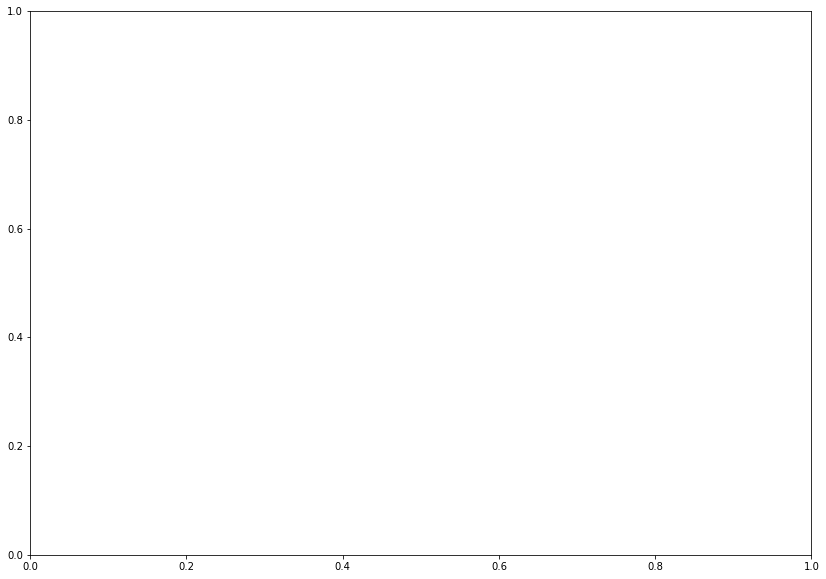

In [75]:
plt.figure(figsize=(14, 10))
plt.plot(range(epochs + 1), losses, label='loss')

plt.figure(figsize=(14, 10))
plt.plot(range(epochs + 1), accuracies, label='accuracy', c='r')

In [ ]:
model.eval()

losses = []
accuracies = []

for xb, yb in test_loader:
    with torch.no_grad():
        outp = model(xb)
        correct_answers = (outp.argmax(-1) == yb).sum()
        accuracy = correct_answers / xb.shape[0]
        accuracies.append(accuracy)
torch.Tensor(accuracies).mean()

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(np.arange(len(test_loader)), accuracies, label='accuracy', c='r')